# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [1]:
clear all
version 15
capture log close
set more off
set line 80
macro drop _all
set seed 8675309
pwd
*We are already in the correct directory
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv
import delimited using "agilepredatorsdata20191116.csv", clear










C:\Users\Jay\SOC211\Problemset1

. copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/
> agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv

. import delimited using "agilepredatorsdata20191116.csv", clear
(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [2]:
ds, alpha varwidth(29)

all_under                 idx_gr                    pe_ind
all_under_w               idx_sfa                   peacqu
chain                     inst_name_new             peswitcherall
dist_black_share_w        investevent               peswitchsystemall
dist_fed_grant_pct_w      ipo                       po_ind
dist_hisp_share_w         loan_amount_borrower_c_w  poacqu
dist_pell_s               not_pe_po                 poswitcherall
dist_white_share_w        online                    poswitchsystemall
fed_grant_pct_w           owner_pe                  selective
grad_rate_150_p2yr_w      pct2yrchrtgrbkaat_w       state_n
grad_rate_150_p4yr_w      pct2yrchrtgrhispt_w       systemid
grad_rate_150_p_w         pct2yrchrtgrwhitt_w       systemnm
grtotltallgradchrt        pct4yrchrtgrbkaat_w       total_enrollment
grtotltchrt2yr            pct4yrchrtgrhispt_w       tuitionall_c_w
grtotltchrt4yr            pct4yrchrtgrwhitt_w       unitid
iclevel                   pctchrtgrbkaat_w          y

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [3]:
%help sum

<!-- END HEAD --> +----------------------------------------+ | See | For the | |-----------------+----------------------| | | | | help summarize | summarize command | | | | | help sum() | sum() function | | | | +----------------------------------------+ <!-- BEGIN FOOT -->


## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
We are interested in characterizing for-profit schools only, we can more easily compare private equity, privately held, and publicly traded categories for various dependent variables such as pell grant revenue.

In [4]:
codebook owner_pe
drop if owner_pe=="State" 
drop if owner_pe=="Community"
drop if owner_pe=="Non-profit"
tab year
    tab year, nol m
keep if year==2014
sum dist_pell_s, detail
codebook dist_pell_s



--------------------------------------------------------------------------------
owner_pe                                                             (unlabeled)
--------------------------------------------------------------------------------

                  type:  string (str15)

         unique values:  6                        missing "":  0/205,262

            tabulation:  Freq.  Value
                        41,264  "Community"
                        66,188  "Non-profit"
                         6,799  "Private equity"
                        59,220  "Privately held"
                        11,559  "Publicly traded"
                        20,232  "State"


(20,232 observations deleted)

(41,264 observations deleted)

(66,188 observations deleted)


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1987 |        821        1.06        1.06
       1988 |        860        1.11        2.17
       1989 |        919        

## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
The Pell Grant revenue distribution (for 2014 for-profit schools) is slightly right skewed and is unimodal. This suggests that there are not categorical differences between the for-profit ownership states.

(bin=35, start=0, width=511.46116)


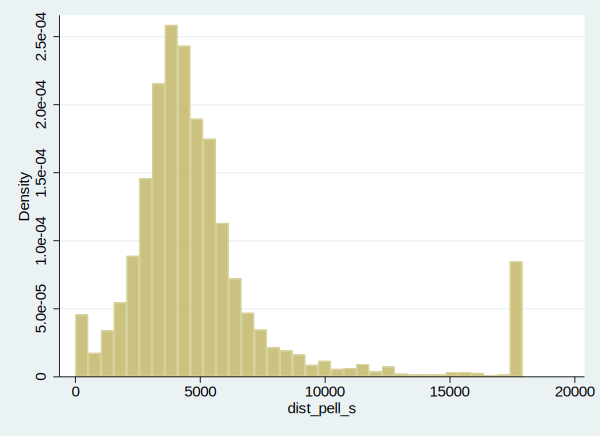

In [11]:
histogram dist_pell_s

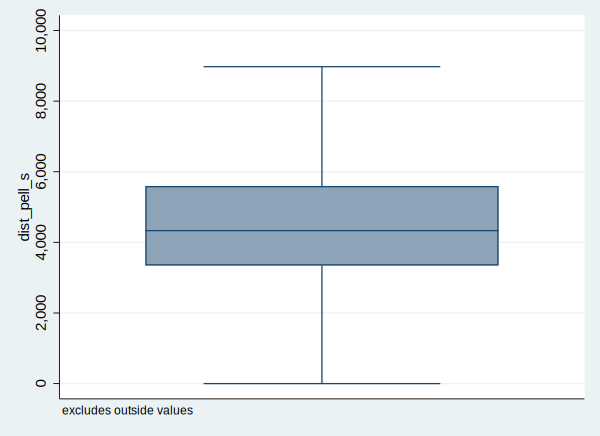

In [6]:
graph box dist_pell_s, nooutsides

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]
1. For profit colleges that are publicly traded or held by private equity will be more likely to offer a 4 year degree than privately held for-profit colleges. Amongst for-profit colleges, these ownership models are more predatory towards students and likely to encourage a degree path which offers uncertain promise of graduation.
2. Degree offering, 2, 2-4, or 4 year, is dhe dependent variable. Ownership form is the independent variable. The hypothesis is ownership predicts predatory 4-year degree- offering 'behavior' within the subset of for-profit colleges.

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [7]:
des iclevel owner_pe
*des is describe variable encoding
encode owner_pe, gen(owner_pe2) label(Ownership_Form)
encode iclevel, gen(iclevel2) label(Degree_Offerings)

tab iclevel2 owner_pe2
*tab iclevel2 owner_pe2, column chi
*shows column percentage and chi square 



              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
iclevel         str35   %35s                  
owner_pe        str15   %15s                  




                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |       216        612        232 |     1,060 
   Four or more years |       104        191        495 |       790 
Less than 2 years (be |       232      1,364        195 |     1,791 
----------------------+---------------------------------+----------
                Total |       552      2,167        922 |     3,641 


## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

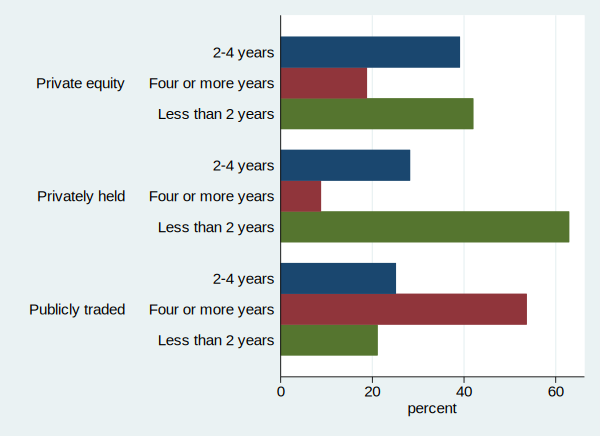

In [8]:
*gen iclevel2=1
xi i.iclevel2, noomit
*noomit will not count missing cases
graph hbar _Iiclevel2_*, label percentages legend(off) over(owner_pe2) showyvars yvaroptions(relabel(1 "2-4 years" 2 "Four or more years" 3 "Less than 2 years"))

## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
Publicly traded colleges are more likely to offer four or more year degrees, privately held colleges are more likely to offer less than 2 year degrees (certificates), with private equity a mix between the two. This fits the hypothesis that ownership is associated with likelihood of offering a four or more year degree.

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
Interpretation below.

Two - four year colleges are mildly more likely to be chain owned, with 4-year colleges highly likely, and 2 year colleges unlikely to be chain owned. Publicly traded are most likely to be chain owned, followed by private equity, with only few privately held colleges being chain owned. Being chain owned is associated with other predatory characteristics.



      chain |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,754       48.17       48.17
          1 |      1,887       51.83      100.00
------------+-----------------------------------
      Total |      3,641      100.00




                      |         chain
             iclevel2 | Not chain  Chain own |     Total
----------------------+----------------------+----------
At least 2 but less t |       455        605 |     1,060 
   Four or more years |       147        643 |       790 
Less than 2 years (be |     1,152        639 |     1,791 
----------------------+----------------------+----------
                Total |     1,754      1,887 |     3,641 


                |            owner_pe2
          chain | Private e  Privately  Publicly  |     Total
----------------+---------------------------------+----------
Not chain owned |        29      1,721          4 |     1,754 
    Chain owned |       523        446     

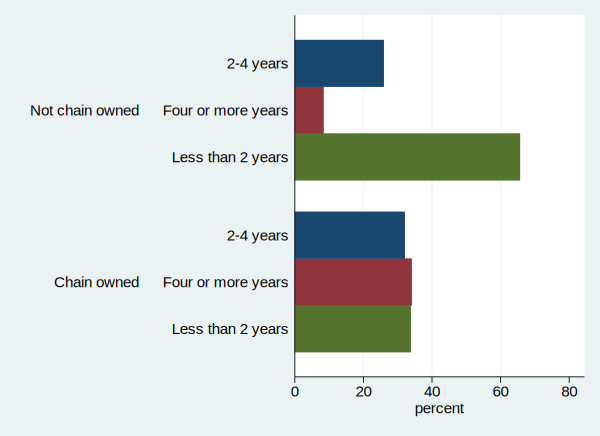

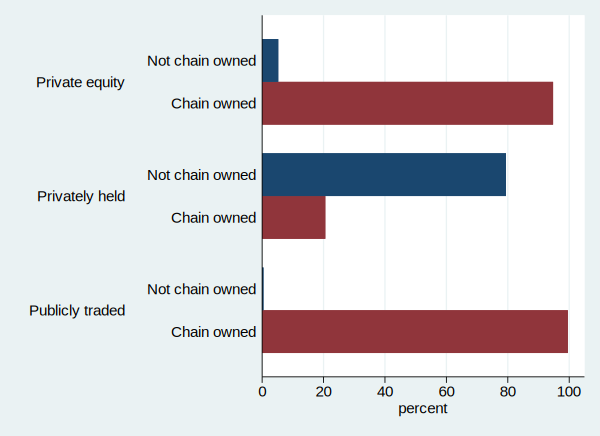

In [9]:
tab chain, nol m
  label define chain 0 "Not chain owned" 1 "Chain owned"
  label values chain chain

tab iclevel2 chain
tab chain owner_pe2

xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over(chain) label percentages legend(off) showyvars yvaroptions(relabel(1 "2-4 years" 2 "Four or more years" 3 "Less than 2 years"))
xi i.chain, noomit
graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) showyvars yvaroptions(relabel(1 "Not chain owned" 2 "Chain owned"))
*graph hbar _Ichain_*, label percentages legend(off) over(owner_pe2) showyvars yvaroptions(relabel(1 "Not chain owned" 2 "Chain owned"))

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
For each of the three degree-granting types, non-chains were most likely to be privately held. For four-year degree-granting institutions, the vast majority of publicly traded institutions were likely to be chains. Four-year, publicly traded institutions were theorized as most predatory; these institutions were also much more likely than not to be chain-owned. Based on the business model described by Eaton et al. and Cottom, it's possible that these institutions profit most from marketing and branding.



--------------------------------------------------------------------------------
-> iclevel = At least 2 but less than 4 years

                |         chain
      owner_pe2 | Not chain  Chain own |     Total
----------------+----------------------+----------
 Private equity |        11        205 |       216 
 Privately held |       444        168 |       612 
Publicly traded |         0        232 |       232 
----------------+----------------------+----------
          Total |       455        605 |     1,060 

--------------------------------------------------------------------------------
-> iclevel = Four or more years

                |         chain
      owner_pe2 | Not chain  Chain own |     Total
----------------+----------------------+----------
 Private equity |        14         90 |       104 
 Privately held |       129         62 |       191 
Publicly traded |         4        491 |       495 
----------------+----------------------+----------
          Total |    

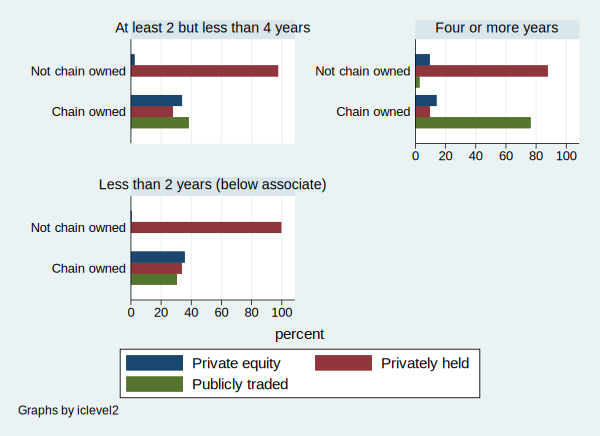

In [10]:
bysort iclevel: tab owner_pe2 chain 
*xi i.chain, noomit
*graph hbar _Ichain_*, over(owner_pe2) label percentages yvaroptions(relabel(1 "Not chain owned" 2 "Chain owned")) by(iclevel2) legend(off)

*control variable should be the bysort; dv is graph, iv is 'over'

xi i.owner_pe2, noomit
graph hbar _Iowner_pe2_*, over(chain) label percentages yvaroptions(relabel(1 "Private equity" 2 "Privately held" 3"Publicly traded")) by(iclevel2) legend(off)